In [4]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [5]:
import csv
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
from bs4 import BeautifulSoup
import string

stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [16]:
sentences=[]
labels=[]
count=0
with open('/train.csv', encoding='UTF-8') as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  next(csvfile)
  for row in reader:
    labels.append(int(row[4]))
    sentence = row[3].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)

print(len(labels))
print(len(sentences))


7613
7613


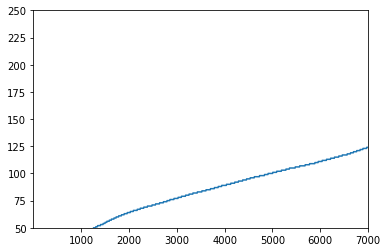

124


In [22]:
xs=[]
ys=[]
current_item=1
for item in sentences:
  xs.append(current_item)
  current_item=current_item+1
  ys.append(len(item))
newys = sorted(ys)

import matplotlib.pyplot as plt
plt.plot(xs,newys)
plt.axis([1, 7000, 50, 250])
plt.show()

print(newys[7000])

In [25]:
vocab_size = 125
embedding_dim = 3
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [26]:

training_size = 5000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [27]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

{'<OOV>': 1, 't': 2, 'co': 3, 'http': 4, 'https': 5, 'fire': 6, 'just': 7, 'not': 8, 'like': 9, 'no': 10, '2': 11, 'will': 12, 'via': 13, 'get': 14, 'emergency': 15, 'new': 16, 'one': 17, 'people': 18, 'dont': 19, 'now': 20, 'body': 21, 'burning': 22, 'news': 23, 'buildings': 24, 'can': 25, 'u': 26, 'first': 27, 'video': 28, 'two': 29, 'man': 30, 'accident': 31, 'got': 32, 's': 33, 'off': 34, 'full': 35, 'us': 36, 'know': 37, 'day': 38, 'back': 39, 'still': 40, 'crash': 41, 'time': 42, 'attack': 43, '1': 44, 'mass': 45, 'going': 46, 'car': 47, 'see': 48, '3': 49, 'train': 50, 'collapse': 51, 'rt': 52, 'fires': 53, 'hiroshima': 54, 'year': 55, 'love': 56, 'dead': 57, '4': 58, '2015': 59, 'death': 60, 'forest': 61, 'today': 62, 'youtube': 63, 'work': 64, 'world': 65, 'disaster': 66, 'years': 67, 'california': 68, 'go': 69, '5': 70, 'life': 71, 'w': 72, 'police': 73, 'best': 74, 'hot': 75, 'cant': 76, 'want': 77, 'flames': 78, 'war': 79, 'bomb': 80, 'way': 81, 'killed': 82, 'say': 83, 'go

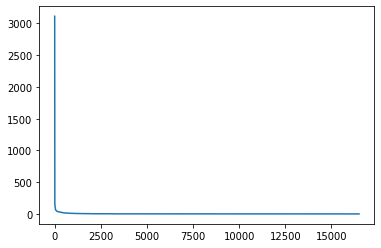

9
4


In [29]:
import matplotlib.pyplot as plt
wc = tokenizer.word_counts
from collections import OrderedDict
newlist = (OrderedDict(sorted(wc.items(), key=lambda t: t[1], reverse=True)))
print(word_index)
print(newlist)
xs=[]
ys=[]
curr_x = 1
for item in newlist:
  xs.append(curr_x)
  curr_x=curr_x+1
  ys.append(newlist[item])

print(ys)
plt.plot(xs,ys)
#plt.axis([300,10000,0,100])
plt.show()
print(ys[1000])
print(ys[2000])

In [30]:
print(ys[1500])
print(ys[2000])
print(ys[2500])

6
4
3


In [31]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [40]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 3)           375       
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               83200     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                6432      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 90,040
Trainable params: 90,040
Non-trainable params: 0
_________________________________________________________________


In [41]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
157/157 - 23s - loss: 2.2825 - accuracy: 0.5816 - val_loss: 0.8152 - val_accuracy: 0.5496
Epoch 2/30
157/157 - 18s - loss: 0.6961 - accuracy: 0.6002 - val_loss: 0.6503 - val_accuracy: 0.6280
Epoch 3/30
157/157 - 18s - loss: 0.6523 - accuracy: 0.6262 - val_loss: 0.6758 - val_accuracy: 0.5660
Epoch 4/30
157/157 - 18s - loss: 0.6331 - accuracy: 0.6590 - val_loss: 0.6180 - val_accuracy: 0.6724
Epoch 5/30
157/157 - 18s - loss: 0.6054 - accuracy: 0.6956 - val_loss: 0.6429 - val_accuracy: 0.6364
Epoch 6/30
157/157 - 18s - loss: 0.5762 - accuracy: 0.7180 - val_loss: 0.6202 - val_accuracy: 0.6732
Epoch 7/30
157/157 - 18s - loss: 0.5717 - accuracy: 0.7220 - val_loss: 0.6179 - val_accuracy: 0.6628
Epoch 8/30
157/157 - 18s - loss: 0.5650 - accuracy: 0.7262 - val_loss: 0.5952 - val_accuracy: 0.6774
Epoch 9/30
157/157 - 18s - loss: 0.5591 - accuracy: 0.7264 - val_loss: 0.5982 - val_accuracy: 0.6747
Epoch 10/30
157/157 - 18s - loss: 0.5564 - accuracy: 0.7308 - val_loss: 0.5989 - val_accura

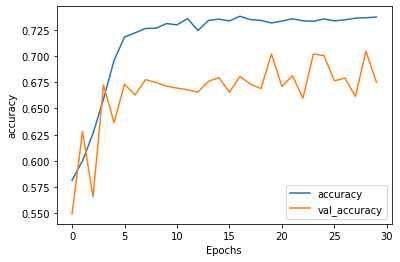

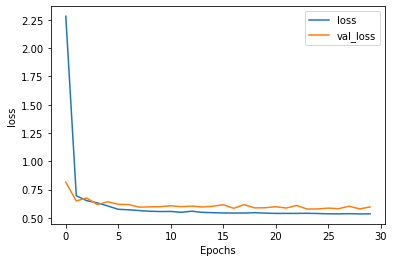

In [42]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [43]:
test_sentences = ["Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all",
                  "It's a beautiful sunny day",
                  "Forest fire near La Ronge Sask. Canada",
                  "Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school "]
sequences = tokenizer.texts_to_sequences(test_sentences)
#print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
#print(padded)

predictions = model.predict(padded)

In [44]:
print(predictions)

[[0.53104675]
 [0.15356782]
 [0.9704428 ]
 [0.248561  ]]
